In [ ]:
#Universidade Federal de Pernambuco
#Disciplina: Introdução a microssimulação
#Professor: Jose Ricardo Nogueira
#Aluno: Paulo Francisco da Silva Junior

In [ ]:
#importações
import pandas as pd
import matplotlib.pyplot as plt

Breve analise de indicadores de pobreza e desigualdade no Brasil utilizando a pnadc 2017

Utilizando o banco de microdados “PNADC_2017” e a sintaxe de
indicadores de pobreza, calcule o número de pobres para o Brasil, antes e
depois das transferências governamentais.

In [ ]:
#Lendo banco e ajustando missings
pnadc = pd.read_csv("/content/drive/MyDrive/Microsimulação/PNADC_2017.csv", sep=";", decimal=",", dtype=float, na_values=" ")
pnadc.fillna(0,inplace=True)

In [ ]:
# INDICADORES DE POBREZA
# LINHA DE POBREZA = 406,00/mês (correspondente a US$5,50/dia (BANCO MUNDIAL))
# POBRES (estemos utilizando a Renda Domiciliar Bruta Per Capita (RDBPC))

In [ ]:
#Filtrando pobres (ANTERIOMENTE A TRANSFERENCIAS GOVERNAMENTAIS)
pnadc.loc[pnadc["RDIPC"]<=406, "POBRE_ATG"] = 1
pnadc.fillna(value={"POBRE_ATG":0},inplace=True)

In [ ]:
# CÁLCULO DO NÚMERO DE POBRES (ANTERIOMENTE A TRANSFERENCIAS GOVERNAMENTAIS)
(pnadc["POBRE_ATG"]*pnadc["PESO"]).sum()

83272953.0

In [ ]:
#Filtrando pobres (POSTERIOMENTE A TRANSFERENCIAS GOVERNAMENTAIS)
pnadc.loc[pnadc["RDBPC"]<=406, "POBRE_PTG"] = 1
pnadc.fillna(value={"POBRE_PTG":0},inplace=True)

In [ ]:
# CÁLCULO DO NÚMERO DE POBRES (POSTERIOMENTE A TRANSFERENCIAS GOVERNAMENTAIS) - Antes de impostos diretos e indiretos
(pnadc["POBRE_PTG"]*pnadc["PESO"]).sum()

45759984.0

Utilizando o banco de microdados “PNADC_2017” e a sintaxe de
indicadores de desigualdade, calcule o coeficiente de Gini para o Brasil,
antes e depois das transferências governamentais.

In [ ]:
pnadc["incomeIni"] = pnadc["RDIPC"]*pnadc["PESO"]

In [ ]:
pnadc.sort_values(by="incomeIni",inplace=True)
pnadc.reset_index(drop=True,inplace=True)

In [ ]:
pnadc["incomeIniProp"] = pnadc["incomeIni"]/pnadc["incomeIni"].sum()

In [ ]:
pnadc["incomeIniCum"] = pnadc["incomeIni"]

In [ ]:
for i in range(1,len(pnadc),1):
  pnadc["incomeIniCum"][i] = pnadc["incomeIniCum"][i-1]+pnadc["incomeIni"][i]

In [ ]:
pnadc["incomeIniCumProp"] = pnadc["incomeIniCum"]/pnadc["incomeIni"].sum()

In [ ]:
pnadc["pessoasCum"] = pnadc["PESO"]

In [ ]:
for i in range(1,len(pnadc),1):
  pnadc["pessoasCum"][i] = pnadc["pessoasCum"][i-1]+pnadc["PESO"][i]

In [ ]:
pnadc["pessoasCumProp"] = pnadc["pessoasCum"]/pnadc["PESO"].sum()

In [ ]:
pnadc["pessoasProp"] = pnadc["PESO"]/pnadc["PESO"].sum()

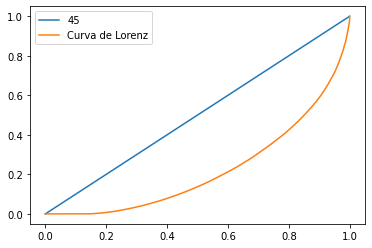

In [ ]:
plt.plot([0,0.5,1],[0,0.5,1],label="45")
plt.plot(pnadc["pessoasCumProp"],pnadc["incomeIniCumProp"],label="Curva de Lorenz")
plt.legend()
plt.show()

In [ ]:
########################################################
# Tentativa de calcular o coeficiente de gini
# Há algum erro

In [ ]:
pnadc["B"] = pnadc["incomeIniCumProp"][0]*pnadc["pessoasProp"][0]/2

In [ ]:
for i in range(1,len(pnadc),1):
  pnadc["B"][i] = (pnadc["incomeIniCumProp"][i] + pnadc["incomeIniCumProp"][i-1])*pnadc["pessoasProp"][i]/2

In [ ]:
pnadc["A"]=0.5-pnadc["B"]

In [ ]:
pnadc["GINI"]=pnadc["A"]/0.5

In [ ]:
pnadc["GINI"].max()

Calculos adicionais

In [ ]:
# HIATO DE POBREZA - Renda Domiciliar Bruta Per Capita
pnadc.loc[pnadc["RDBPC"]<=406.00,"Hiato_Pobreza"]= 406.00 - pnadc["RDBPC"]
pnadc.fillna(value={"Hiato_Pobreza":0},inplace=True)

# CÁLCULO DO VALOR DO HIATO AGREGADO DE POBREZA
(pnadc["Hiato_Pobreza"]*pnadc["PESO"]).sum()

7848699361.270001